In [1]:
%load_ext autoreload
%autoreload 2

from scikitplot import metrics, helpers
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

Plot ROC Curve
To generate a ROC curve, we need to create arrays of true and false positives at different probability thresholds. The scikit-learn library provides a roc_curve method, which calculates TPR and FPR for range of threshold. The roc_curve takes true labels and probability estimates of the positive class. The probability estimates of the positive can be returned from decision_function method or predict_proba method in the model.

Among the classifiers we have learned so far, the following two use decision_function function to return the probability estimates of the positive class:

- Logistic Regression
- Support Vector Machine

The next three use predict_proba function to return the probability estimates of the positive class:

- K-nearest Neighbor
- Decision Tree
- Random Forest

# <font color='red'>Models</font>

# Random Forest

In [3]:
clf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred_ = clf.predict_proba(X_test)

# Logistic Regression

In [4]:
lr_model = LogisticRegression(C = 10, max_iter= 100000).fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred_ = lr_model.predict_proba(X_test)

# Gaussian NB

In [5]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred_ = nb.predict_proba(X_test)

# Gaussian NB Multiclass

In [6]:
Xx, yy = load_digits(return_X_y=True)
X_trainn, X_testt, y_trainn, y_testt = train_test_split(Xx, yy)
nbb = GaussianNB()
nbb.fit(X_trainn, y_trainn)
nbb_pred = nbb.predict(X_testt)
nbb_pred_ = nbb.predict_proba(X_testt)

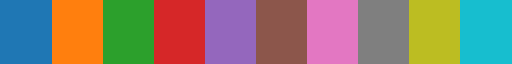

In [7]:
x = sns.color_palette("tab10", as_cmap=True)
x

------------------------------
# Multiple Confusion Matrix

-------------------------------

In [8]:
models = [lr_pred_[:,1], clf_pred_[:,1], nb_pred_[:,1]]
label_model = ['Logistic Regression', 'Random Forest','Naive Bayes']

In [9]:
matx = [lr_pred, clf_pred, nb_pred, nbb_pred]
y_true = [y_test]*3 + [y_testt]
names = label_model + ['Gaussian Multiclass']

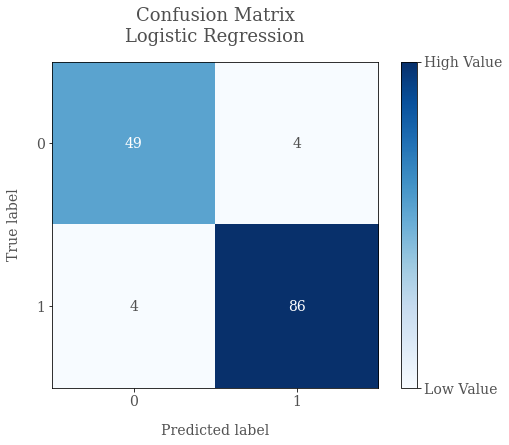

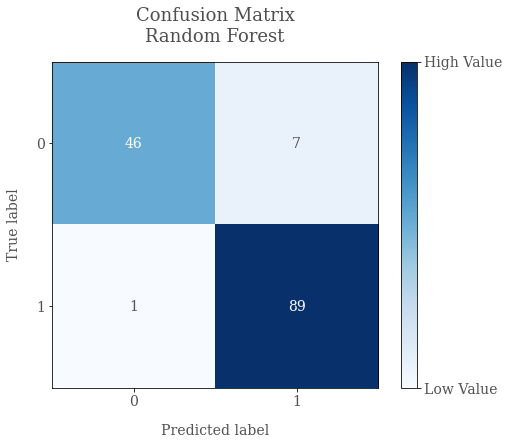

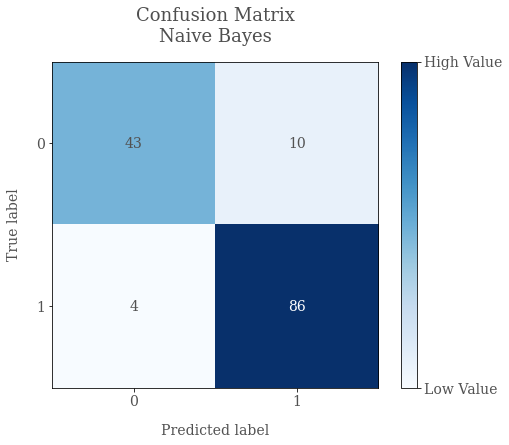

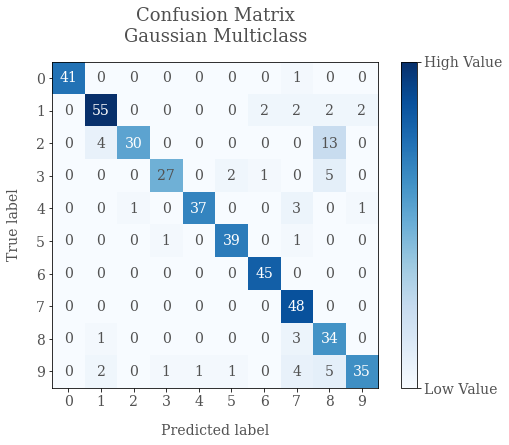

In [10]:
for name, y_tr, clf in zip(names,y_true, matx):
    metrics.plot_confusion_matrix(y_tr, clf, title = 'Confusion Matrix\n' + name)
    #plt.show()

-------------------------------
# ROC Multiple Classifiers with binaries values

------------------------------

**************************************************
          Logistic Regression
          Optimal threshold   0.67668612
          True Positive Rate  0.95555556
          False Positive Rate 0.03773585
**************************************************
**************************************************
          Random Forest
          Optimal threshold   0.71000000
          True Positive Rate  0.96666667
          False Positive Rate 0.03773585
**************************************************
**************************************************
          Naive Bayes
          Optimal threshold   0.99972064
          True Positive Rate  0.92222222
          False Positive Rate 0.07547170
**************************************************


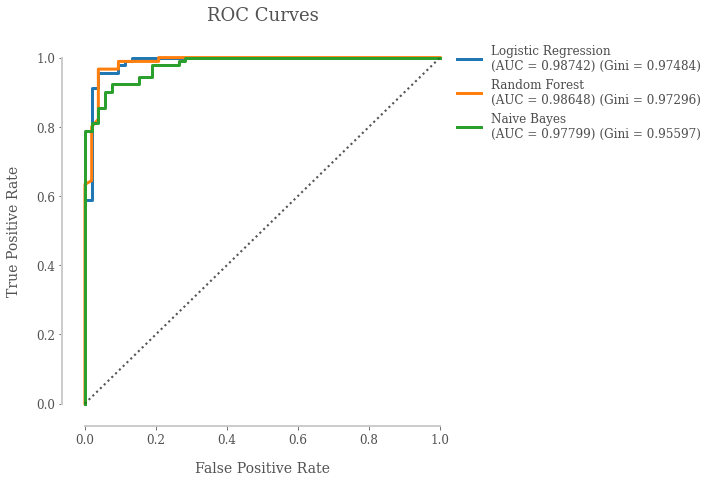

In [11]:
fig, ax  = plt.subplots(figsize = (7,7))
for i, (model, label) in enumerate(zip(models, label_model)):
    metrics.plot_roc(y_test, model, ax = ax, color = x.colors[i], label_model = label,
                    opt_thres = True, plot_ot = False, bbox_to_anchor = (1.65,.71))
plt.show()

# ROC Only class positive

**************************************************
          Logistic Regression
          Optimal threshold   0.67668612
          True Positive Rate  0.95555556
          False Positive Rate 0.03773585
**************************************************


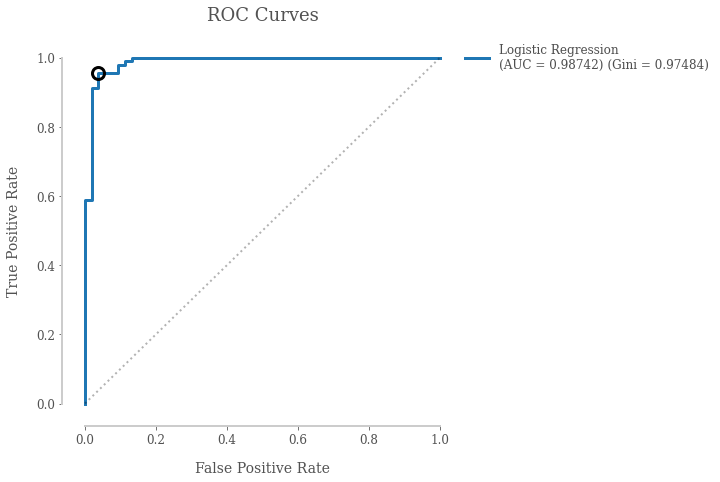

In [12]:
metrics.plot_roc(y_test, models[0], label_model = label_model[0],
                    opt_thres = True, plot_ot = True)
plt.show()

# ROC Two class

**************************************************
          Class 0
          Optimal threshold   0.34047885
          True Positive Rate  0.96226415
          False Positive Rate 0.04444444
**************************************************
**************************************************
          Class 1
          Optimal threshold   0.67668612
          True Positive Rate  0.95555556
          False Positive Rate 0.03773585
**************************************************


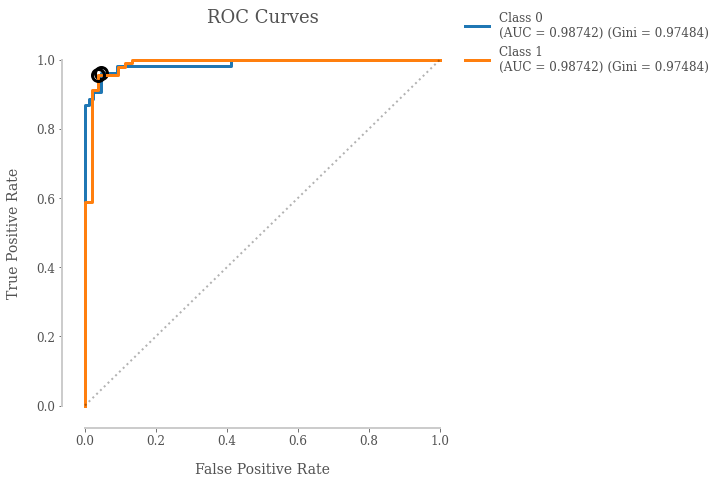

In [13]:
metrics.plot_roc(y_test, lr_pred_, multiclass = True,
                 opt_thres = True, plot_ot = True)
plt.show()

# ROC Multiple Classes

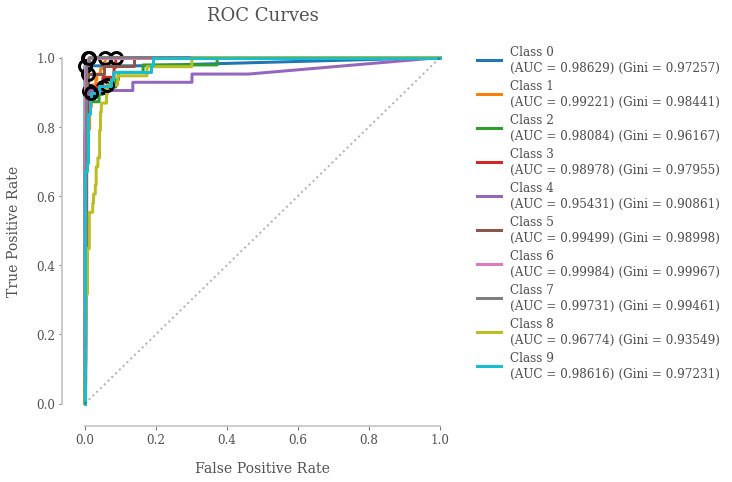

In [14]:
metrics.plot_roc(y_testt, nbb_pred_, multiclass = True,
                 opt_thres = False, plot_ot = True, bbox_to_anchor= (1.7,.08))
plt.show()

-----------------------
# KS Plot 

--------------------

In [15]:
clfs = [lr_pred_, clf_pred_, nb_pred_]

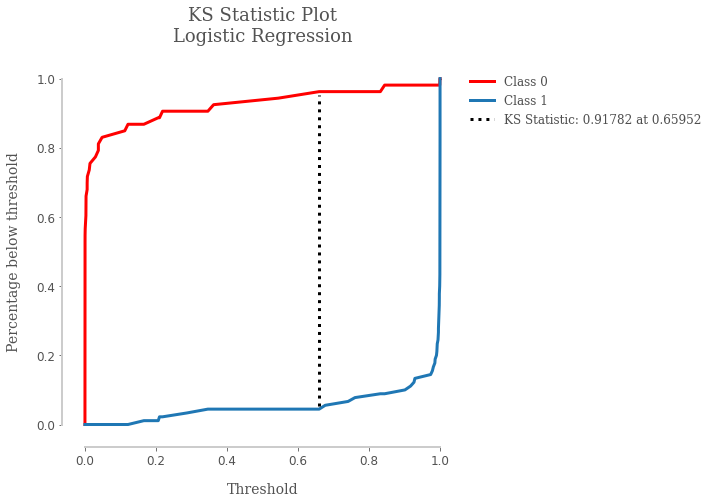

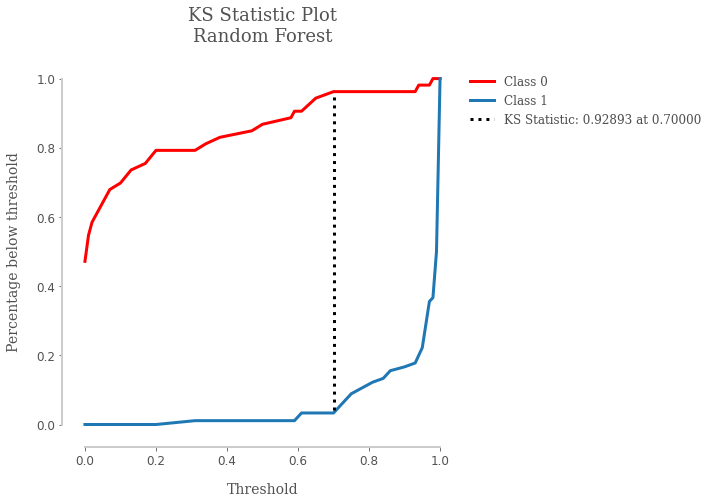

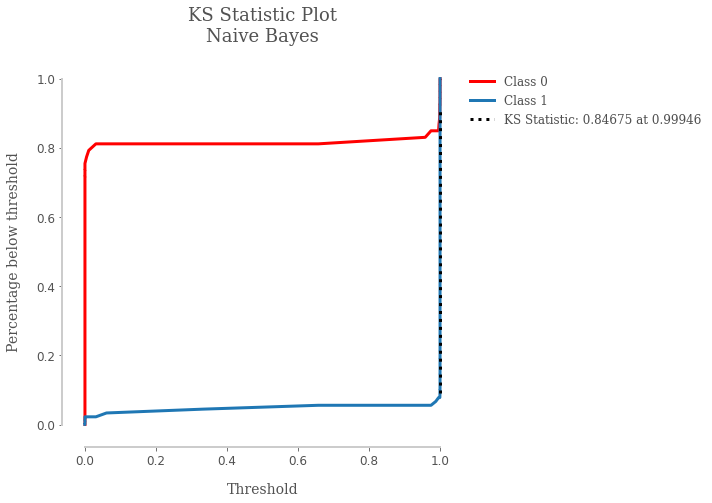

In [16]:
for clf, name in zip(clfs, label_model):
    metrics.plot_ks_statistic(y_test, clf, title= 'KS Statistic Plot\n' + name)
plt.show()

In [17]:
(y_test==1).sum(),(y_test==0).sum() 

(90, 53)

In [18]:
(lr_pred==1).sum(),(lr_pred==0).sum() 

(90, 53)

-----------------------------
# Precision Recall Curve Multiple Classifiers with binaries values

--------------------

**************************************************
          Logistic Regression
          Optimal threshold 0.67668612
          Precision         0.97727273
          Recall            0.95555556
**************************************************
**************************************************
          Random Forest
          Optimal threshold 0.71000000
          Precision         0.97752809
          Recall            0.96666667
**************************************************
**************************************************
          Naive Bayes
          Optimal threshold 0.99972064
          Precision         0.95402299
          Recall            0.92222222
**************************************************


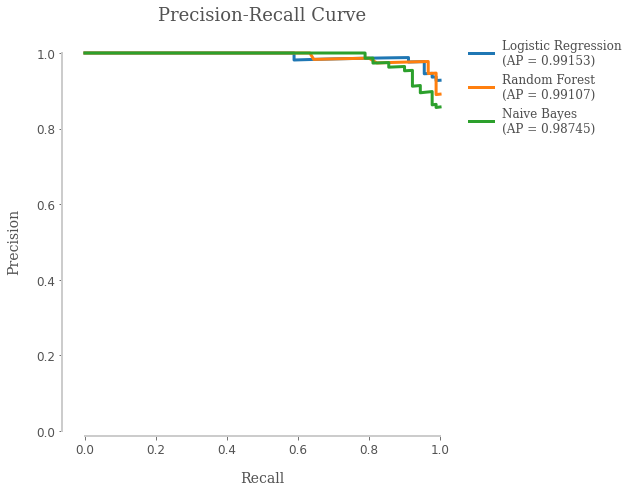

In [19]:
fig, ax  = plt.subplots(figsize = (7,7))

for i, (model, label) in enumerate(zip(models, label_model)):
    metrics.plot_precision_recall(y_test, model, ax = ax, color = x.colors[i], 
                                  label_model = label, opt_thres = True, plot_ot = False, 
                                  bbox_to_anchor = (1,.75))
plt.show()

# Precision Recall Curve Only class positive

**************************************************
          Logistic Regression
          Optimal threshold 0.67668612
          Precision         0.97727273
          Recall            0.95555556
**************************************************


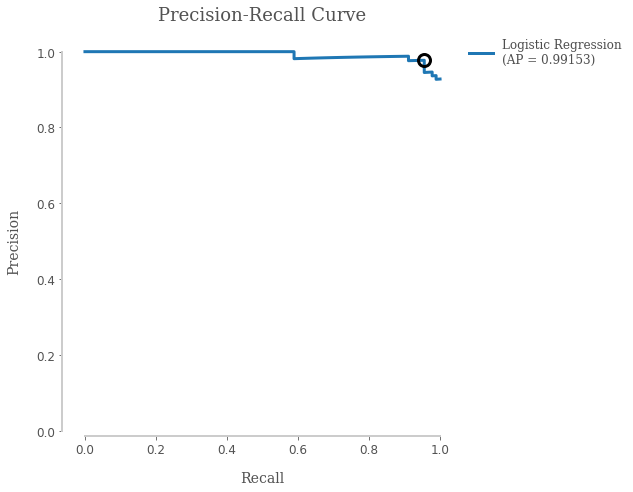

In [20]:
metrics.plot_precision_recall(y_test, models[0], label_model = label_model[0],
                              opt_thres = True, plot_ot = True)
plt.show()

# Precision Recall Curve Two class

**************************************************
          Class 0
          Optimal threshold 0.34047885
          Precision         0.92727273
          Recall            0.96226415
**************************************************
**************************************************
          Class 1
          Optimal threshold 0.67668612
          Precision         0.97727273
          Recall            0.95555556
**************************************************


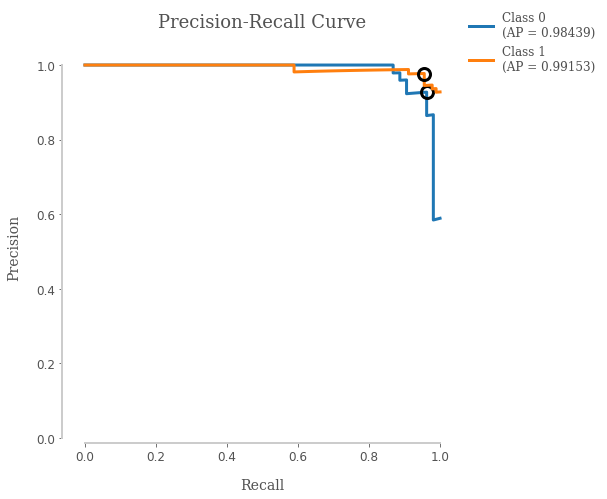

In [21]:
metrics.plot_precision_recall(y_test, lr_pred_,multiclass=True,
                              opt_thres = True, plot_ot = True)
plt.show()

# Precicion Recall Curve Multiple Classes

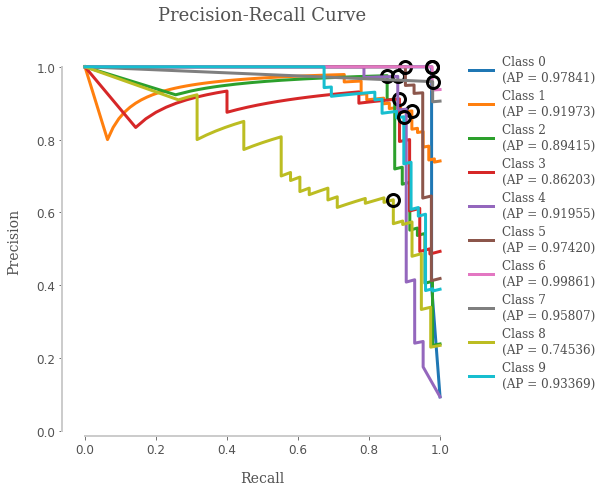

In [22]:
metrics.plot_precision_recall(y_testt, nbb_pred_, multiclass = True,
                              opt_thres = False, plot_ot = True, bbox_to_anchor= (1,.08))
plt.show()

--------------
# Silhouette

---------------

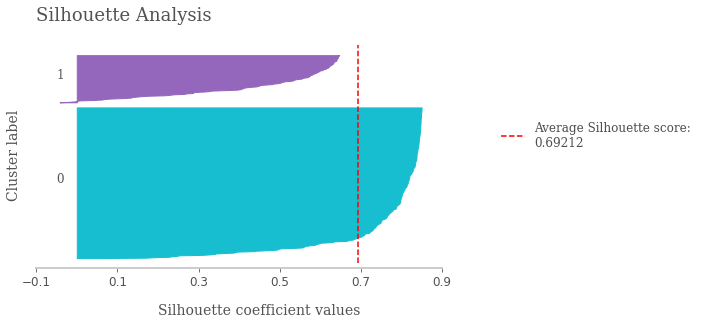

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X_train)
metrics.plot_silhouette(X_train, cluster_labels)
plt.show()

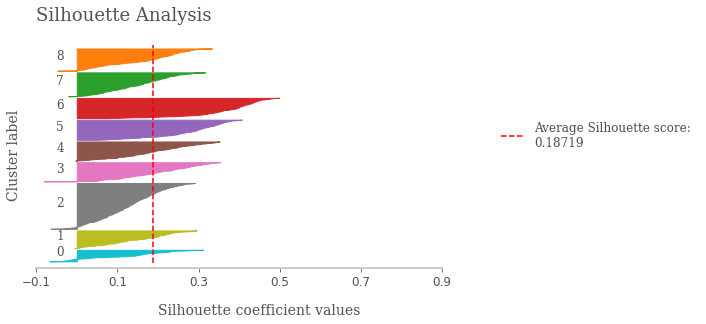

In [24]:
kmeans = KMeans(n_clusters = 9)
cluster_labels = kmeans.fit_predict(X_trainn)
metrics.plot_silhouette(X_trainn, cluster_labels)
plt.show()

```python
print(plt.colormaps())

from sklearn.calibration import CalibratedClassifierCV
cc = CalibratedClassifierCV(base_estimator = LogisticRegression(C = 10, max_iter= 100000), cv = 5).fit(X_train, y_train)
cc_pred_ = cc.predict_proba(X_test)

```

-----------------
# Calibration Curve

-----------------

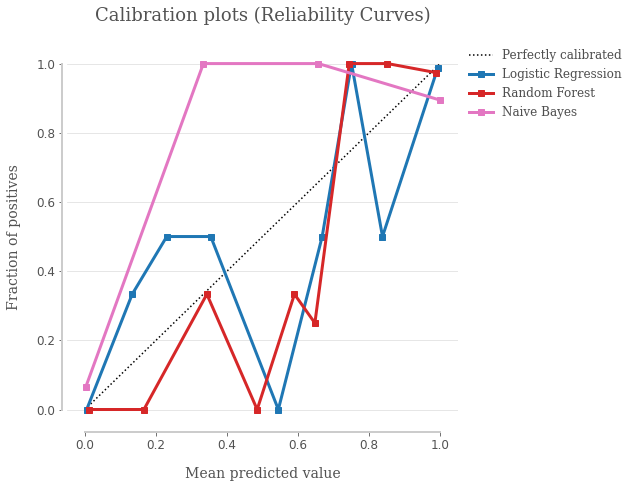

In [25]:
metrics.plot_calibration_curve(y_test, clfs, clf_names = label_model)
plt.show()

--------------------
# Gain Curve

-----------

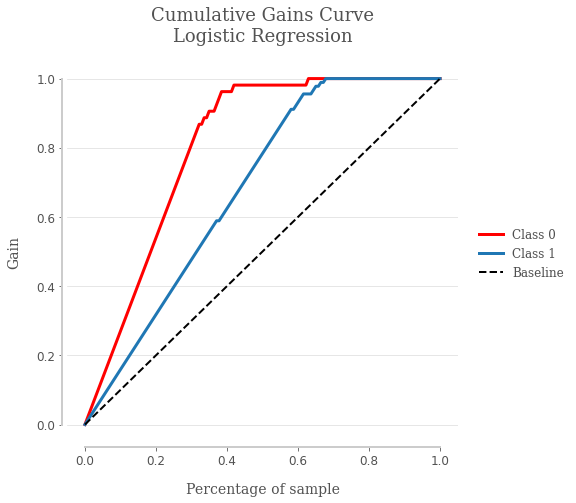

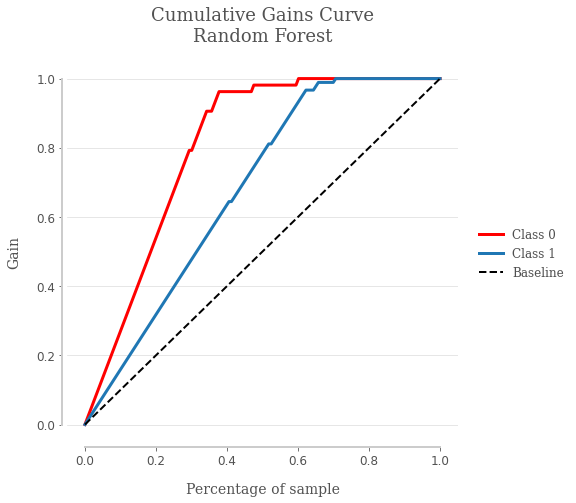

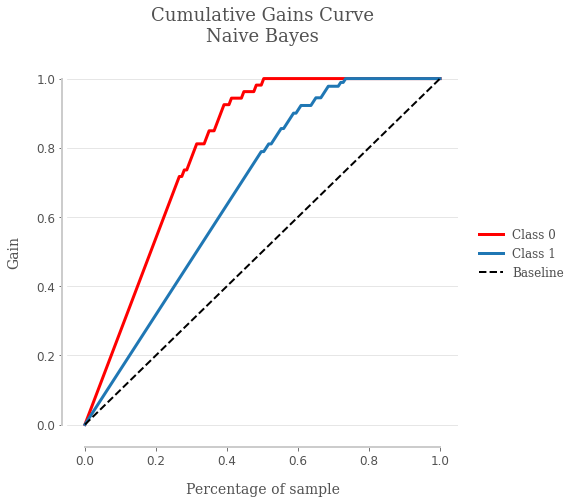

In [26]:
for clf, name in zip(clfs, label_model):
    metrics.plot_cumulative_gain(y_test, clf, title = 'Cumulative Gains Curve\n' + name)
plt.show()

# Lift Curve

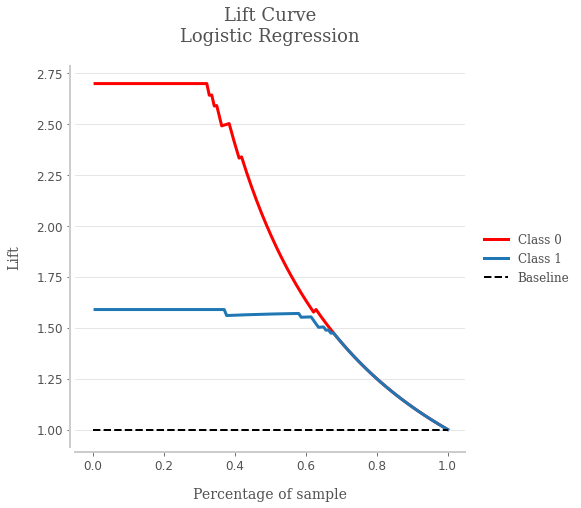

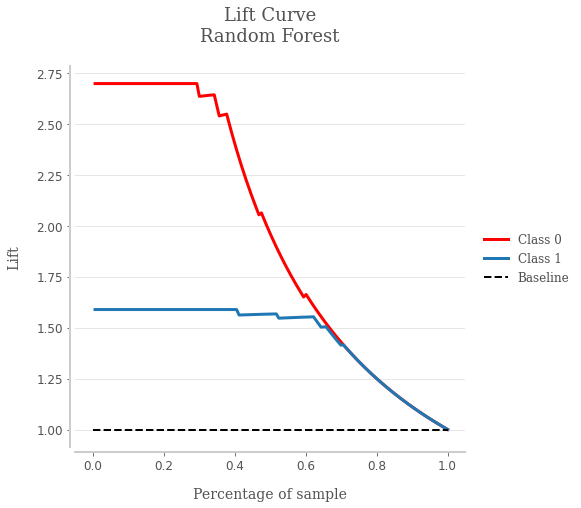

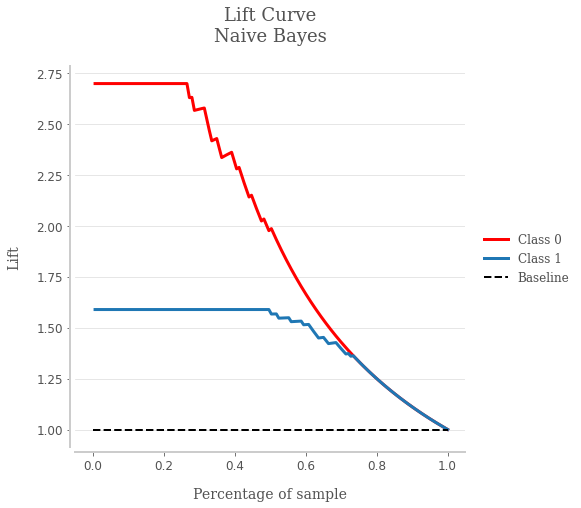

In [27]:
for clf, name in zip(clfs, label_model):
    metrics.plot_lift_curve(y_test, clf, title = 'Lift Curve\n' + name)
plt.show()